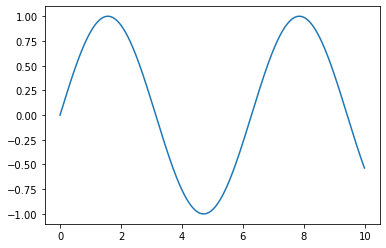

ValueError: 'other' is not a Bokeh model: 'auto'

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from bokeh.layouts import layout
from bokeh.models import Div, RangeSlider, Spinner, Slider
from bokeh.plotting import figure, show

dt = 0.01
x = np.arange(0, 10, 0.01)
y = np.sin(x)
plt.plot(x, y)
plt.show()

# create plot with circle glyphs
p = figure(x_range=(0, 10), width=1000, height=500)
points = p.circle(x=x, y=y, size=1, fill_color="#FF0000")
current_point = p.circle(size=3, fill_color="#0000FF")

# set up textarea (div)
div = Div(
    text="""
          <p>Select the circle's size using this control element:</p>
          """,
    width=200,
    height=30,
)

# set up spinner
spinner = Spinner(
    title="Circle size",
    low=0.1,
    high=5,
    step=0.1,
    value=points.glyph.size,
    width=200,
)
spinner.js_link("value", points.glyph, "size")

# set up RangeSlider
range_slider = RangeSlider(
    title="Adjust x-axis range",
    start=0,
    end=10,
    step=dt,
    value=(p.x_range.start, p.x_range.end),
)

range_slider.js_link("value", p.x_range, "start", attr_selector=0)
range_slider.js_link("value", p.x_range, "end", attr_selector=1)


# moving point using a slider
slider = Slider(
    title="Move point",
    start=0,
    end=10,
    step=dt,
    value=0,
)
slider.js_link("value", current_point.selection_glyph, "x", attr_selector=0)


# create layout
layout = layout(
    [
        [div, spinner],
        [range_slider, slider],
        [p],
    ]
)

# show result
show(layout)

In [2]:
import bokeh

ModuleNotFoundError: No module named 'bokeh.layouts'; 'bokeh' is not a package

# Plotly

In [2]:
import numpy as np

from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import ipywidgets as widgets
from ipywidgets import interact

In [3]:
dt = 0.01
x = np.arange(0, 10, 0.01)
y = np.sin(x)

In [86]:
fig = go.FigureWidget()
fig.add_scatter(x=x, y=y, mode='lines', name='sin')
fig.add_scatter(x=[0], y=[np.sin(0)], mode='markers', marker=dict(size=10), name='current point')

fig.layout = go.Layout(
    xaxis=dict(range=[0, 10]),
    yaxis=dict(range=[-1.5, 1.5]),
)
# change the color of the scatter points
fig.data[0].marker.color = 'blue'
fig.data[1].marker.color = 'red'

@interact(x=(0,10,0.01))
def update_plot(x):
    with fig.batch_update():
        fig.data[1].x = [x]
        fig.data[1].y = [np.sin(x)]
        # fig.data[1].x = x
        # fig.data[1].y = y
        # fig.layout.

fig

fig2 = go.FigureWidget()
fig2.add_scatter(x=x, y=np.cos(x), mode='lines', name='sin')
fig2.add_scatter(x=[0], y=[np.cos(0)], mode='markers', marker=dict(size=10), name='current point')

fig2.layout = go.Layout(
    xaxis=dict(range=[0, 10]),
    yaxis=dict(range=[-1.5, 1.5]),
)
# change the color of the scatter points
fig2.data[0].marker.color = 'blue'
fig2.data[1].marker.color = 'red'

@interact(x=(0,10,0.01))
def update_plot(x):
    with fig2.batch_update():
        fig2.data[1].x = [x]
        fig2.data[1].y = [np.cos(x)]
        # fig.data[1].x = x
        # fig.data[1].y = y
        # fig.layout.

fig2

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0, step=0.01), Output()), _dom_classes=('…

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0, step=0.01), Output()), _dom_classes=('…

FigureWidget({
    'data': [{'marker': {'color': 'blue'},
              'mode': 'lines',
              'name':…

In [60]:
print(fig._get_subplot_rows_columns)

<bound method BaseFigure._get_subplot_rows_columns of Figure({
    'data': [{'marker': {'color': 'blue'},
              'mode': 'lines',
              'name': 'sin',
              'type': 'scatter',
              'x': array([0.  , 0.01, 0.02, ..., 9.97, 9.98, 9.99]),
              'xaxis': 'x',
              'y': array([ 0.        ,  0.00999983,  0.01999867, ..., -0.51860795, -0.527132  ,
                          -0.53560333]),
              'yaxis': 'y'},
             {'marker': {'color': 'red', 'size': 10},
              'mode': 'markers',
              'name': 'current point',
              'type': 'scatter',
              'x': array([4.47]),
              'xaxis': 'x',
              'y': array([-0.97076734]),
              'yaxis': 'y'},
             {'marker': {'color': 'blue'},
              'mode': 'lines',
              'name': 'cos',
              'type': 'scatter',
              'x': array([0.  , 0.01, 0.02, ..., 9.97, 9.98, 9.99]),
              'xaxis': 'x2',
             

In [103]:
# figWidget = go.FigureWidget()
fig = make_subplots(rows=1, cols=2)
figWidget = go.FigureWidget(fig)

figWidget.add_scatter(x=x, y=y, mode='lines', name='sin', col=1, row=1)
figWidget.add_scatter(x=[0], y=[np.sin(0)], mode='markers', marker=dict(size=10), name='current point', col=1, row=1)

figWidget.add_scatter(x=x, y=np.cos(x), mode='lines', name='cos', col=2, row=1)
figWidget.add_scatter(x=[0], y=[np.cos(0)], mode='markers', marker=dict(size=10), name='current point', col=2, row=1)

figWidget.update_layout(xaxis=dict(range=[0, 12]), yaxis=dict(range=[-1.5, 1.5]),
                  xaxis2=dict(range=[0, 11]), yaxis2=dict(range=[-1.5, 1.5]),                    
)


# print(fig)

# change the color of the scatter points

figWidget.data[0].marker.color = 'blue'
figWidget.data[1].marker.color = 'red'

figWidget.data[2].marker.color = 'blue'
figWidget.data[3].marker.color = 'red'

@interact(t=(0,10,0.01))
def update_plot(t):
    with figWidget.batch_update():
        figWidget.data[1].x = np.array([t])
        figWidget.data[1].y = np.sin([t])
        figWidget.data[3].x = np.array([t])
        figWidget.data[3].y = np.cos([t])

    # print(figWidget)
        

figWidget


interactive(children=(FloatSlider(value=5.0, description='t', max=10.0, step=0.01), Output()), _dom_classes=('…

FigureWidget({
    'data': [{'marker': {'color': 'blue'},
              'mode': 'lines',
              'name':…

# Create an interactive plot of the trajectory of a projectile.

## Plot the x,y axes

In [36]:
def create_interactive_plot(encoded_samples, time_steps, points, N_start, N_end):
    fig = make_subplots(rows=1, cols=3)
    figWidget = go.FigureWidget(fig)
    # add a black background to the figure
    figWidget.add_scatter(x=points[:,0], y=points[:,1], mode='lines', marker=dict(size=1), name='true positions', col=1, row=1)
    figWidget.add_scatter(x=[points[0,0]], y=[points[0,1]], mode='markers', marker=dict(size=10), name='current point', col=1, row=1)

    figWidget.add_scatter(x=time_steps, y=encoded_samples[:, 0], mode='lines', name='coord1', col=2, row=1)
    figWidget.add_scatter(x=[time_steps[0]], y=[encoded_samples[0,0]], mode='markers', marker=dict(size=10), name='current coord1', col=2, row=1)

    figWidget.add_scatter(x=time_steps, y=encoded_samples[:, 1], mode='lines', name='coord2', col=3, row=1)
    figWidget.add_scatter(x=[time_steps[0]], y=[encoded_samples[0,1]], mode='markers', marker=dict(size=10), name='current coord2', col=3, row=1)

    # figWidget.update_layout(xaxis=dict(range=[points[:,0].min(), points[:,0].max()]), yaxis=dict(range=[points[:,1].min(), points[:,1].max()]),
    #                 xaxis2=dict(range=[N_start*dt, N_end*dt]), yaxis2=dict(range=[0.49, 0.52]),
    #                     xaxis3=dict(range=[N_start*dt, N_end*dt]), yaxis3=dict(range=[0.46, 0.48]),
    # )


    # change the color of the scatter points

    figWidget.data[0].marker.color = 'blue'
    figWidget.data[1].marker.color = 'red'

    figWidget.data[2].marker.color = 'blue'
    figWidget.data[3].marker.color = 'purple'

    figWidget.data[4].marker.color = 'blue'
    figWidget.data[5].marker.color = 'orange'

    @interact(t=(time_steps.min(),time_steps.max(),dt))
    def update_plot(t):
        with figWidget.batch_update():
            # change the current point of 
            # the true position along the trajectory
            figWidget.data[1].x = [points[int(t/dt) - N_start,0]]
            figWidget.data[1].y = [points[int(t/dt) - N_start,1]]

            # the current point of the encoded sample on the x axis
            figWidget.data[3].x = [time_steps[int(t/dt) - N_start]]
            figWidget.data[3].y = [encoded_samples[int(t/dt) - N_start,0]]

            # the current point of the encoded sample on the y axis
            figWidget.data[5].x = [time_steps[int(t/dt) - N_start]]
            figWidget.data[5].y = [encoded_samples[int(t/dt) - N_start,1]]

        # print(figWidget)
            
    # save the figure as a html file with the interactive widget
    # figWidget.write_html('images/AE_ODE/encoded_reconstruction/encoded_reconstruction_slow_spiral.html')    
    return figWidget


def create_interactive_plot_phase(encoded_samples, time_steps, points, N_start, N_end):
    fig = make_subplots(rows=1, cols=2)
    figWidget = go.FigureWidget(fig)
    # add a black background to the figure
    figWidget.add_scatter(x=points[:,0], y=points[:,1], mode='lines', marker=dict(size=1), name='true positions', col=1, row=1)
    figWidget.add_scatter(x=[points[0,0]], y=[points[0,1]], mode='markers', marker=dict(size=10), name='current point', col=1, row=1)

    figWidget.add_scatter(x=encoded_samples[:, 0], y=encoded_samples[:, 1], mode='lines', name='phase', col=2, row=1)
    figWidget.add_scatter(x=[encoded_samples[0, 0]], y=[encoded_samples[0, 1]], mode='markers', marker=dict(size=10), name='current phase', col=2, row=1)
    # figWidget.update_layout(xaxis=dict(range=[points[:,0].min(), points[:,0].max()]), yaxis=dict(range=[points[:,1].min(), points[:,1].max()]),
    #                 xaxis2=dict(range=[N_start*dt, N_end*dt]), yaxis2=dict(range=[0.49, 0.52]),
    #                     xaxis3=dict(range=[N_start*dt, N_end*dt]), yaxis3=dict(range=[0.46, 0.48]),
    # )


    # change the color of the scatter points

    figWidget.data[0].marker.color = 'blue'
    figWidget.data[1].marker.color = 'red'

    figWidget.data[2].marker.color = 'blue'
    figWidget.data[3].marker.color = 'purple'

    @interact(t=(time_steps.min(),time_steps.max(),dt))
    def update_plot(t):
        with figWidget.batch_update():
            # change the current point of 
            # the true position along the trajectory
            figWidget.data[1].x = [points[int(t/dt) - N_start,0]]
            figWidget.data[1].y = [points[int(t/dt) - N_start,1]]

            # the current point of the encoded sample on the x axis
            figWidget.data[3].x = [encoded_samples[int(t/dt) - N_start,0]]
            figWidget.data[3].y = [encoded_samples[int(t/dt) - N_start,1]]

        # print(figWidget)
            
    # save the figure as a html file with the interactive widget
    # figWidget.write_html('images/AE_ODE/encoded_reconstruction/encoded_reconstruction_slow_spiral.html')    
    return figWidget


In [6]:
import torch
from src.utils import ConvAE

In [38]:
pathInputs = "images/AE_ODE/encoded_reconstruction/trues_images_fast_spiral.npy"
pathModel = "models/AE/conv_custom_2_gaussian_r_1_custom_loss_alpha_0_0.pt"

images = np.load(pathInputs)
model = ConvAE(height=28, width=28, latent_dim=2)
model.load_state_dict(torch.load(pathModel))

Number of parameters in the model: 220387


<All keys matched successfully>

In [39]:
encoded_samples = model.encoder_linear(model.encode(torch.from_numpy(images).float())).detach().numpy()
encoded_samples.shape

(10000, 2)

In [42]:
np.save("images/AE_ODE/encoded_reconstruction/continuous_encoded_samples_fast_spiral.npy", encoded_samples)

In [40]:
N_start = 0
N_end = 10000
step_size = 1
plot_encoded_samples = encoded_samples[N_start:N_end:step_size]
print(plot_encoded_samples.shape)
dt = 0.001
time_steps = np.arange(0, plot_encoded_samples.shape[0]*dt, dt)[N_start:N_end:step_size]


points = np.load("images/AE_ODE/encoded_reconstruction/trues_positions_fast_spiral.npy")[N_start:N_end:step_size]
print(points.shape)

create_interactive_plot(plot_encoded_samples, time_steps, points, N_start, N_end)

(10000, 2)
(10000, 2)


interactive(children=(FloatSlider(value=4.999, description='t', max=9.999, step=0.001), Output()), _dom_classe…

FigureWidget({
    'data': [{'marker': {'color': 'blue', 'size': 1},
              'mode': 'lines',
          …

In [41]:
create_interactive_plot_phase(plot_encoded_samples, time_steps, points, N_start, N_end)

interactive(children=(FloatSlider(value=4.999, description='t', max=9.999, step=0.001), Output()), _dom_classe…

FigureWidget({
    'data': [{'marker': {'color': 'blue', 'size': 1},
              'mode': 'lines',
          …

In [175]:
N_start = 0
N_end = 8000
step_size = 1
encoded_samples = np.load('images/AE_ODE/encoded_reconstruction/encoded_samples_fast_spiral.npy')[N_start:N_end:step_size]
print(encoded_samples.shape)
dt = 0.001
time_steps = np.arange(0, encoded_samples.shape[0]*dt, dt)[N_start:N_end:step_size]


points = np.load("images/AE_ODE/encoded_reconstruction/trues_positions_fast_spiral.npy")[N_start:N_end:step_size]
print(points.shape)

create_interactive_plot(encoded_samples, time_steps, points, N_start, N_end)

(8000, 2)
(8000, 2)


interactive(children=(FloatSlider(value=3.999, description='t', max=7.9990000000000006, step=0.001), Output())…

FigureWidget({
    'data': [{'marker': {'color': 'blue', 'size': 1},
              'mode': 'lines',
          …

In [ ]:
# change the color of the scatter points
fig.data[0].marker.color = 'blue'
fig.data[1].marker.color = 'red'

@interact(x=(0,10,0.01))
def update_plot(x):
    with fig.batch_update():
        fig.data[1].x = [x]
        fig.data[1].y = [np.sin(x)]
        # fig.data[1].x = x
        # fig.data[1].y = y
        # fig.layout.

fig